In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

## Construct the OptimalK class using the joblib backend
### Supported backends are:
- joblib
- multiprocessing (python builtin)
- None (use single core)

In [2]:
optimalK = OptimalK(parallel_backend='joblib')
optimalK

OptimalK(n_jobs=8, parallel_backend="joblib")

## Create test data, with 3 cluster centers and call optimalK with a list of  clusters to fit to.

In [3]:
%%time
X, y = make_blobs(n_samples=int(1e5), n_features=2, centers=3, random_state=25)
print('Data shape: ', X.shape)

n_clusters = optimalK(X, cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)

Data shape:  (100000, 2)
Optimal clusters:  3
CPU times: user 148 ms, sys: 40 ms, total: 188 ms
Wall time: 7.24 s


## A DataFrame of gap values with each passed cluster count is now available

In [4]:
optimalK.gap_df.head()

,gap_value,n_clusters
0,-5.586326,1.0
1,-3.511082,2.0
2,-3.347763,3.0
3,-3.682077,4.0
4,-3.705856,5.0


## Plot the n_clusters against their gap values.

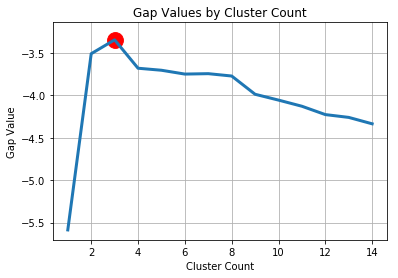

In [5]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

## `optimalK()` returns n_clusters, we can use that to fit the final KMeans model...

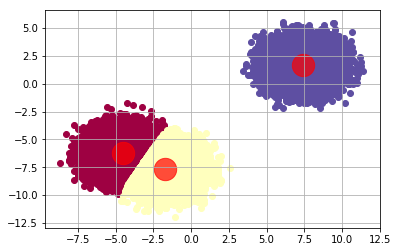

In [6]:
# Now that we have the optimal clusters, n, we build our own KMeans model...
km = KMeans(n_clusters)
km.fit(X)

df = pd.DataFrame(X, columns=['x','y'])
df['label'] = km.labels_

colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))

for color, label in zip(colors, df.label.unique()):
    
    tempdf = df[df.label == label]
    plt.scatter(tempdf.x, tempdf.y, c=color)
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], c='r', s=500, alpha=0.7, )
plt.grid(True)
plt.show()

### Notes:

Please be aware that, as the image above hints to, number of clusters can be subjective. This is merely meant to provide a suggestion to the number of clusters in your data; the true amount can vary depending upon your specific objective. The clusters here can be interpreted as three, but also clearly just two. Also due to random initialization, the suggested n_clusters could also vary.